# ----------Student Performance Prediction ----------

# 1. Project Description

The ultimate goal of any educational institution is offering the best educational experience and knowledge to the students. 
 
Identifying the students who need extra support and taking the appropriate actions to enhance their performance plays an important role in achieving that goal.

In this Model , linear regression have been used to predict the performance of the student

Keywords: Linear Regression , Student performance prediction.
    


# 2.Introduction

The economic success of any country highly depends on making higher education more affordable and that considers one of the main concerns for any government. One of the factors that contributes to the educational expenses is the studying time spent by students.

ML techniques can be used to forecast the performance of the students and identifying the at risk students as early as possible so appropriate actions can be taken to enhance their performance.

One of the most important steps when using these techniques is choosing the attributes or the descriptive features which used as input to the machine learning algorithm. The attributes can be GENDER,RACE/ETHNICITY,PARENTAL LEVEL OF EDUCATION,WEATHER THEY TOOK COACHING OR NOT,THEIR PAST SCORE IN SUBJECTS , STUDY TIME THEY SPENT ETC. 

The activities of this research include feature engineering to create the students dataset, data collecting, data pre-processing, creating and evaluating four machine learning models, and finding the best model and analyzing the results.


# 3.The Proposed System 

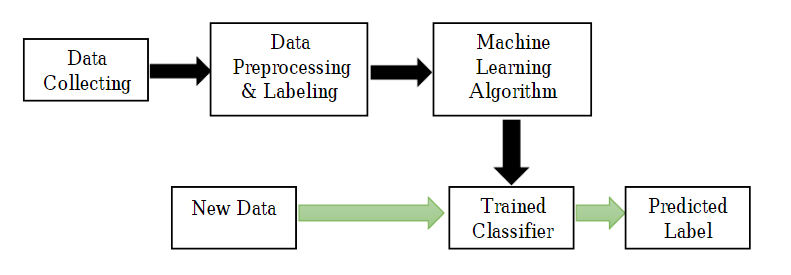

1.The first would be to collect the data from the data source.

2.That data would be the raw data, that contains many unwanted or missing data so we have to deal with it by data cleaning.

3.we have to preprocess and level the data.

4.The ML algorithm build a model using the train data and test data.

5.The ML Algorithm produces a trained model or a trained classifier that can take as an input a new data row and predicts its label.


## Implementation

### Import all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### import the dataset

In [2]:
df=pd.read_csv('student_data.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
df.info()   ##info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [4]:
df.describe()   ## describe the dataset

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [5]:
df.isnull().sum()  ## missing data

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [6]:
df['address'].unique()

array(['U', 'R'], dtype=object)

In [7]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [8]:
df['G3'].unique()

array([ 6, 10, 15, 11, 19,  9, 12, 14, 16,  5,  8, 17, 18, 13, 20,  7,  0,
        4], dtype=int64)

# EDA

In [11]:
categorical_vars = df.dtypes[df.dtypes == 'object']
numerical_vars = df.dtypes[df.dtypes == 'int64']
categorical_vars, numerical_vars

(school        object
 sex           object
 address       object
 famsize       object
 Pstatus       object
 Mjob          object
 Fjob          object
 reason        object
 guardian      object
 schoolsup     object
 famsup        object
 paid          object
 activities    object
 nursery       object
 higher        object
 internet      object
 romantic      object
 dtype: object,
 age           int64
 Medu          int64
 Fedu          int64
 traveltime    int64
 studytime     int64
 failures      int64
 famrel        int64
 freetime      int64
 goout         int64
 Dalc          int64
 Walc          int64
 health        int64
 absences      int64
 G1            int64
 G2            int64
 G3            int64
 dtype: object)

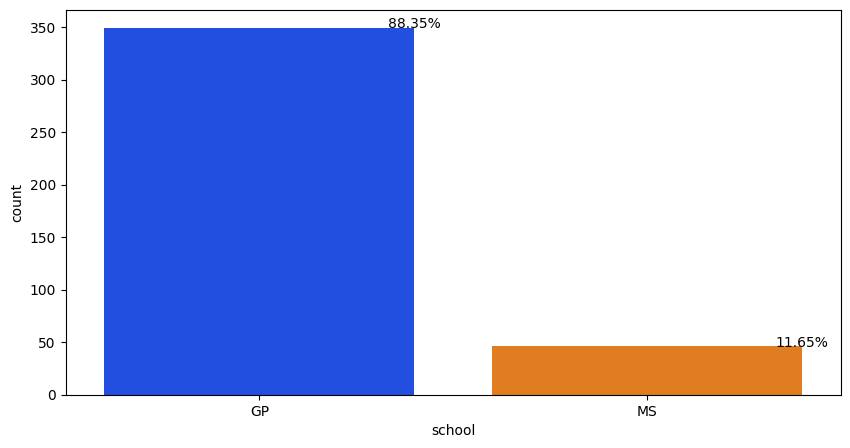

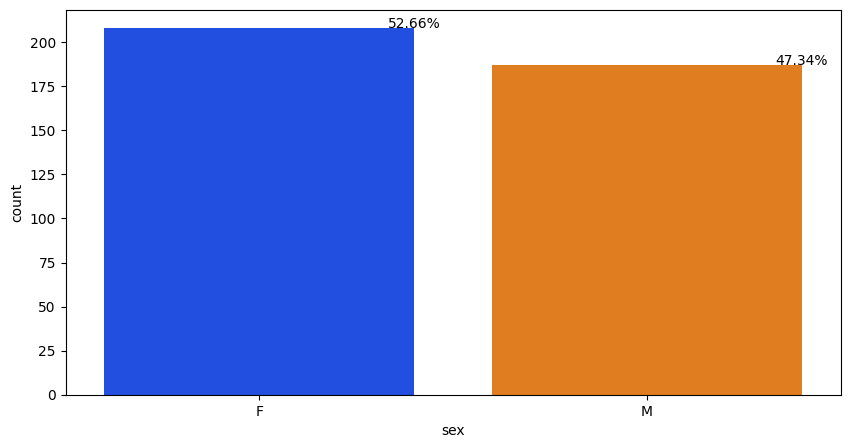

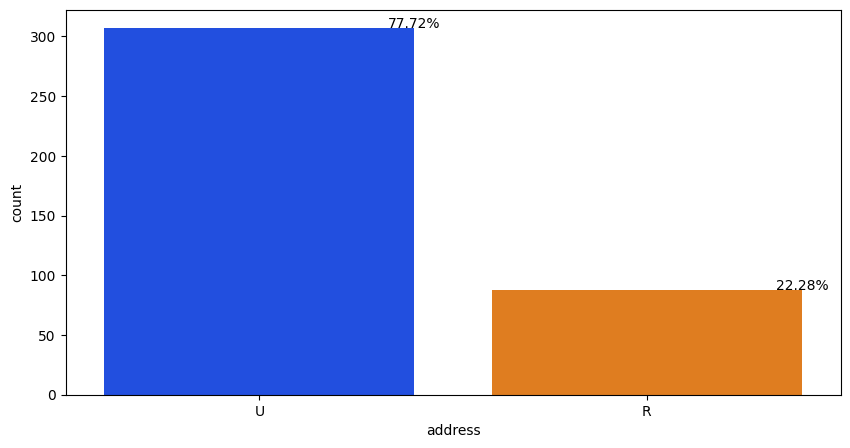

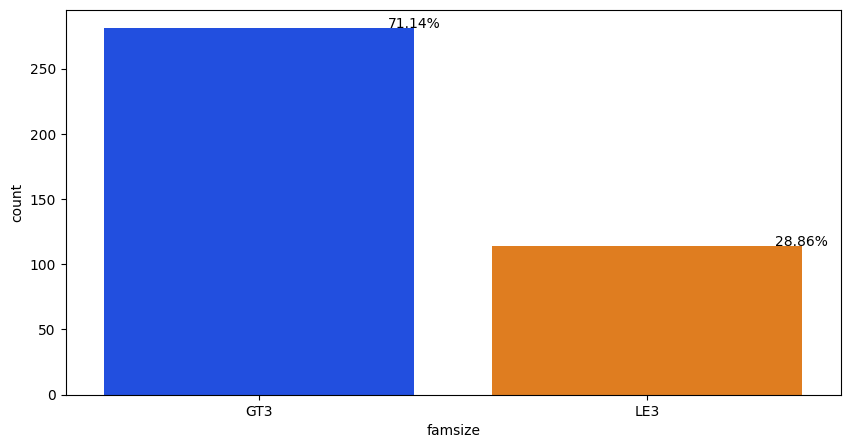

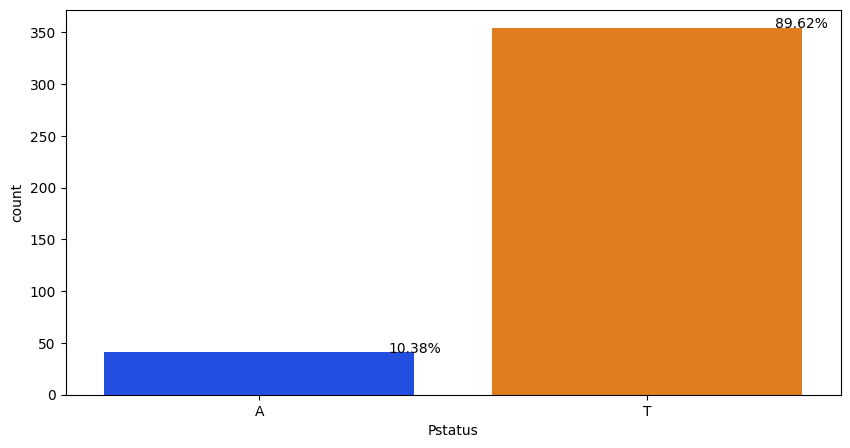

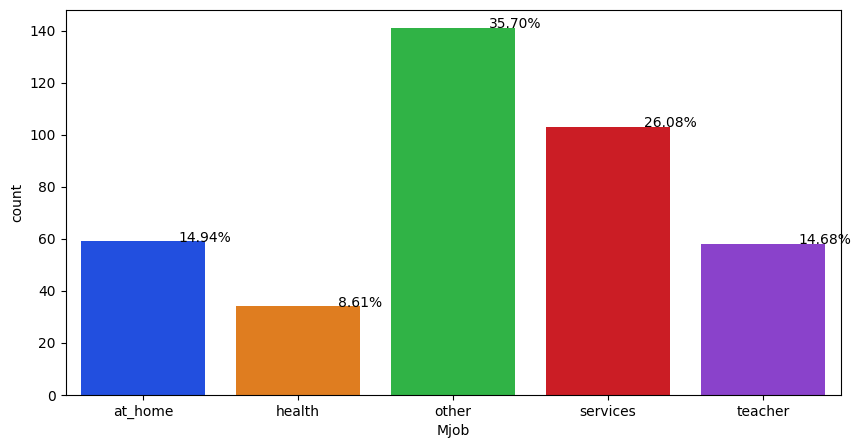

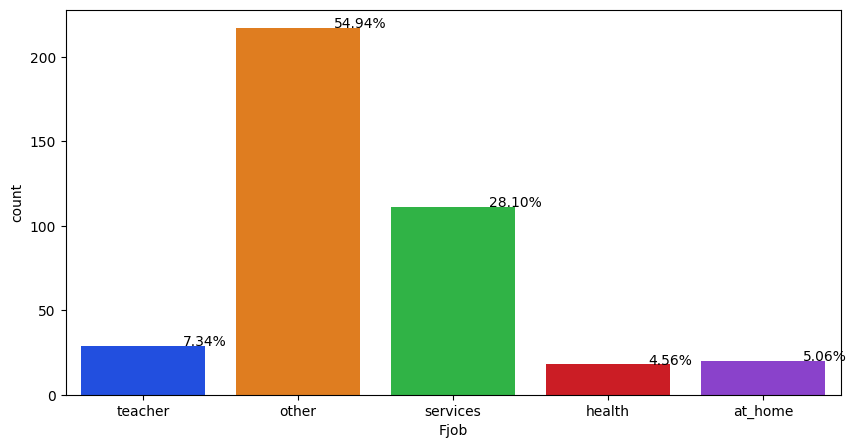

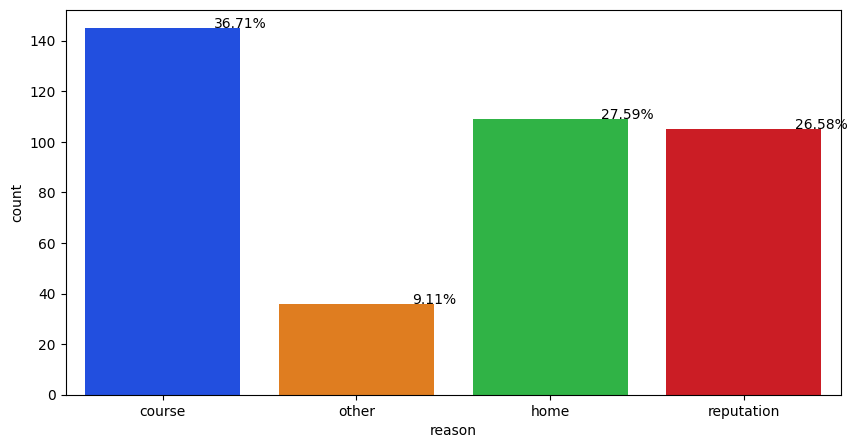

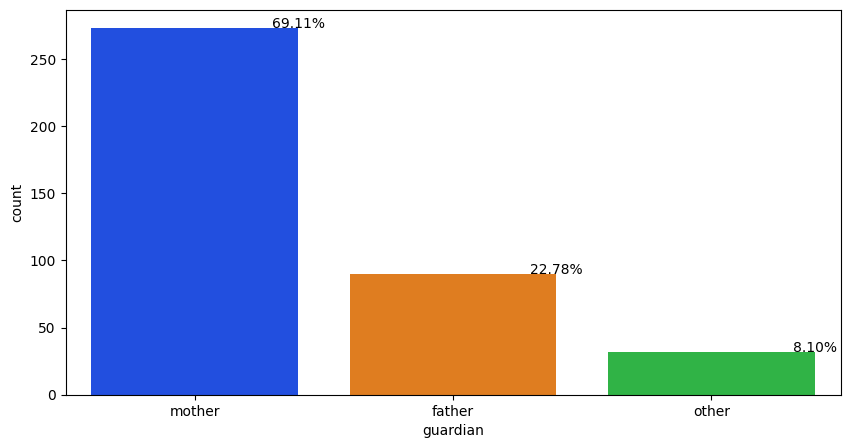

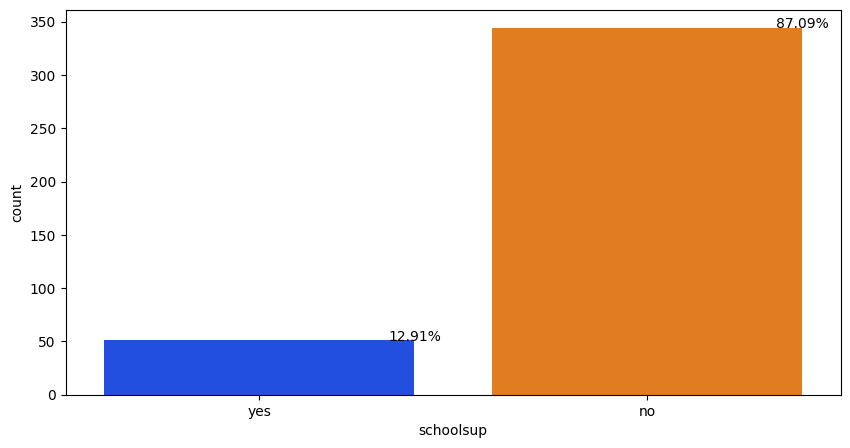

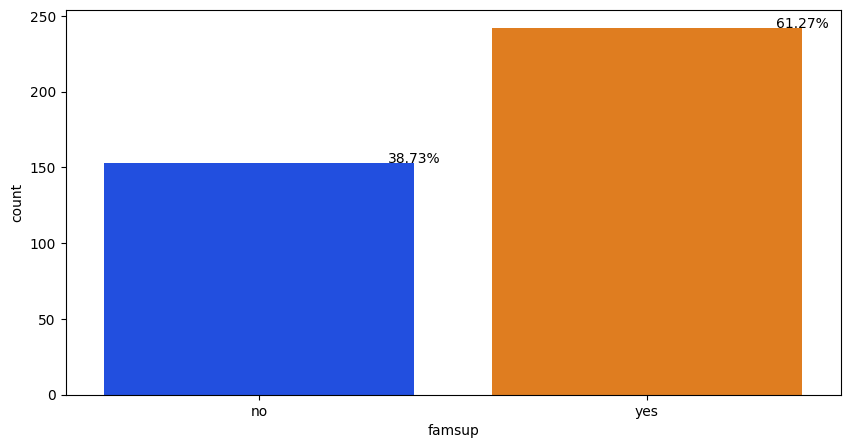

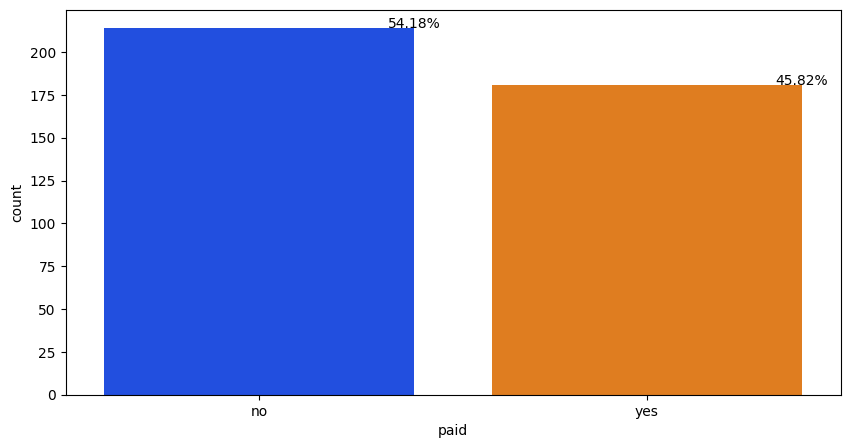

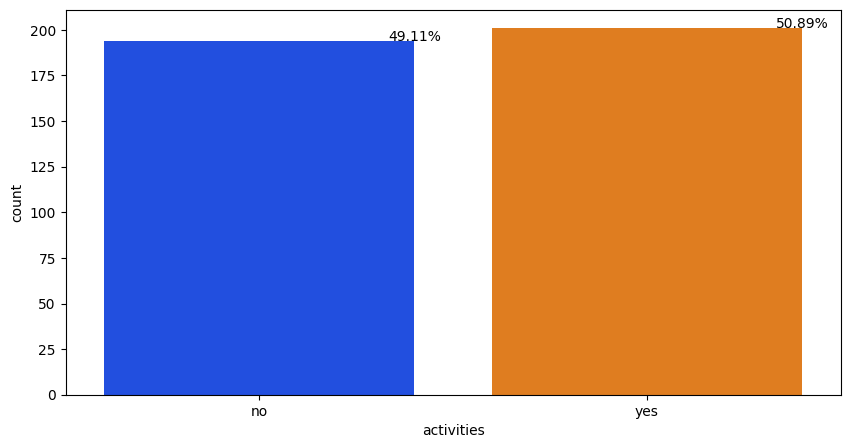

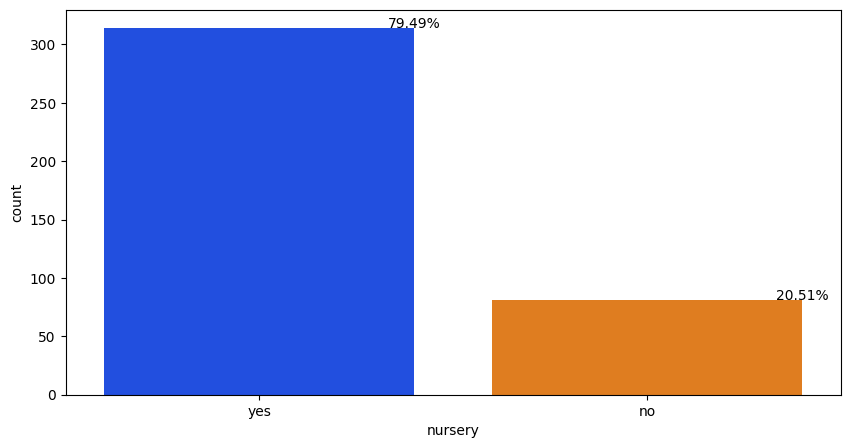

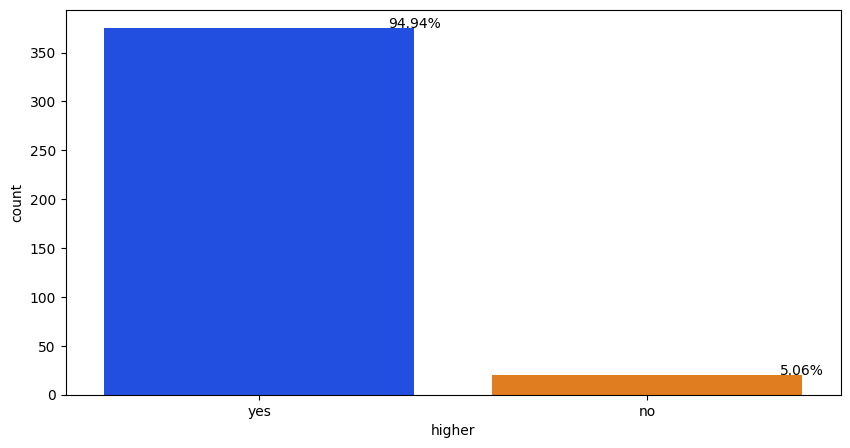

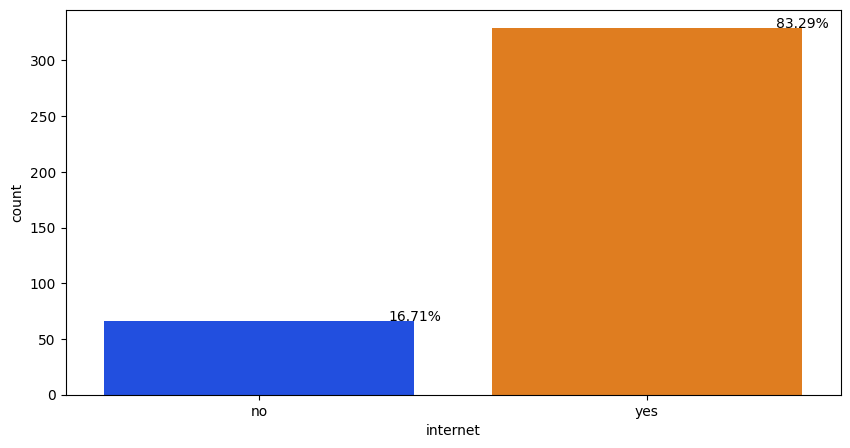

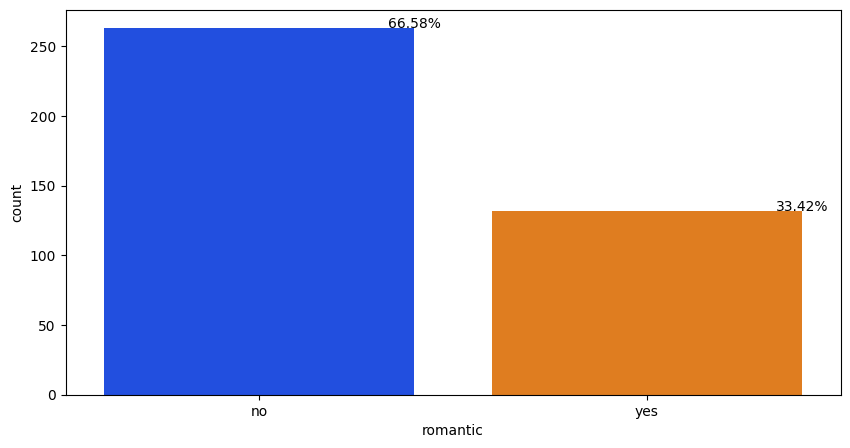

In [12]:
# Categorical data plots
for i in categorical_vars.index:
    plt.figure(figsize= (10,5))
    graph = sns.countplot(x = i, data = df, palette= 'bright')
    total = float(len(df))
    for p in graph.patches:
        pct = f"{(100 * p.get_height()/total):.2f}%"
        x = p.get_x() + p.get_width()
        y = p.get_height()
        graph.annotate(pct, (x, y),ha='center')
    plt.show()



Numerical data plots

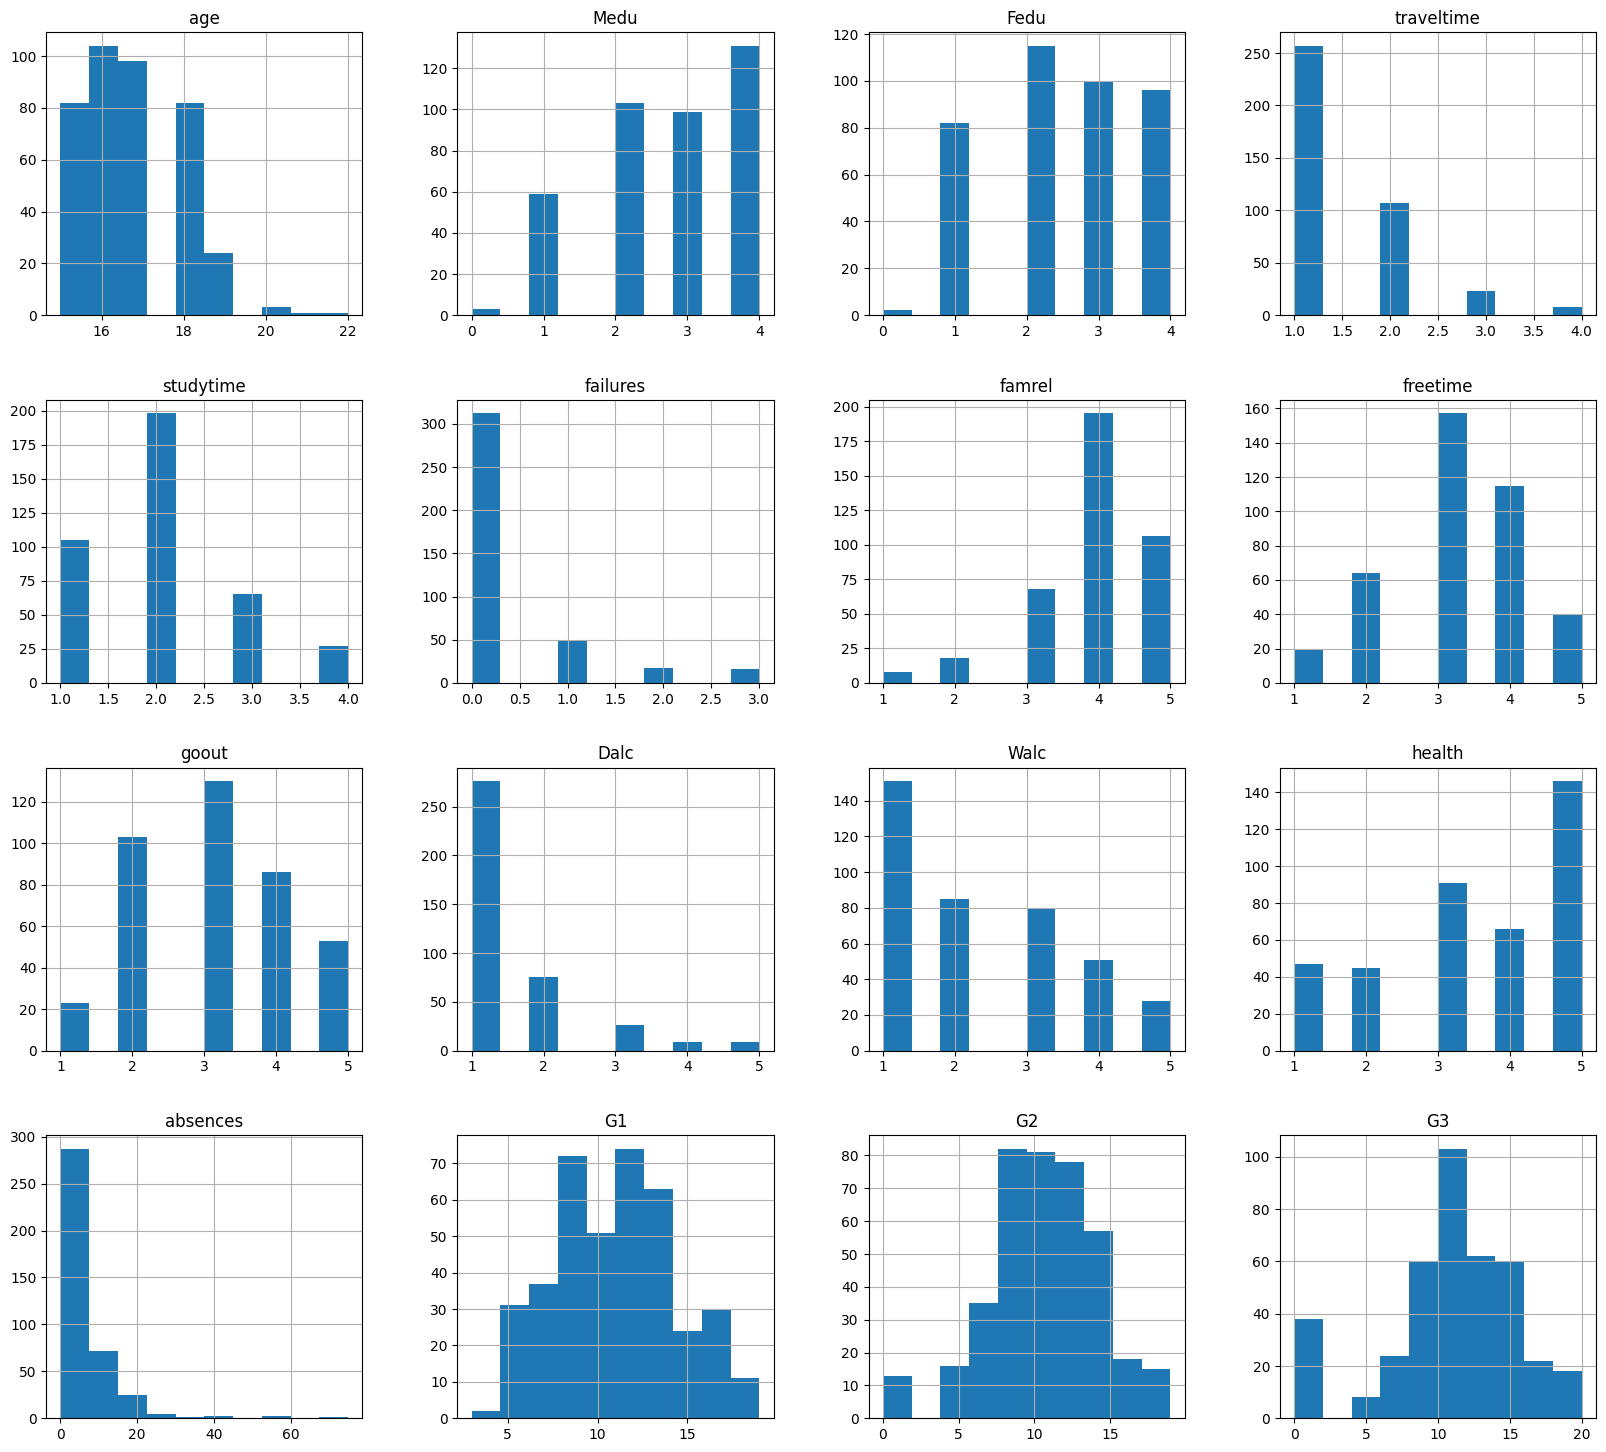

In [13]:
df.hist(figsize=(20,18))
plt.show()


Detail Observation

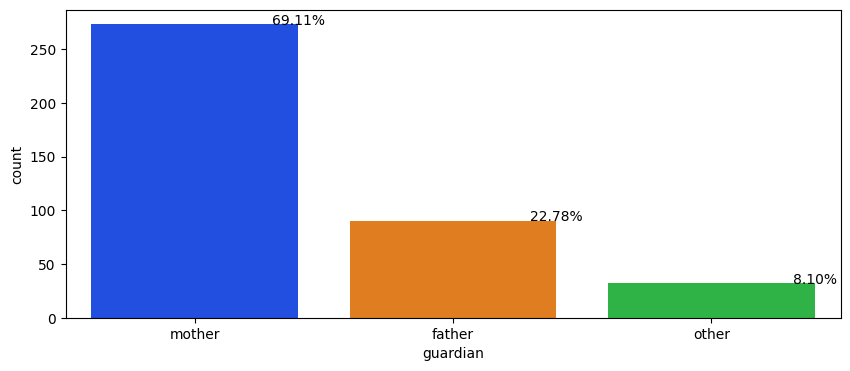

In [16]:
plt.figure(figsize= (10,4))
graph = sns.countplot(x = 'guardian', data = df, palette= 'bright')
total = float(len(df))
for p in graph.patches:
    pct = f"{(100 * p.get_height()/total):.2f}%"
    x = p.get_x() + p.get_width()
    y = p.get_height()
    graph.annotate(pct, (x, y),ha='center')
plt.show()

Students in Rural and Urban areas
• ~74% students live in Urban areas
• It is clear from the bar plot that more students in urban areas get higher study time
• More students from urabn areas have a commute time of less than 15 mins

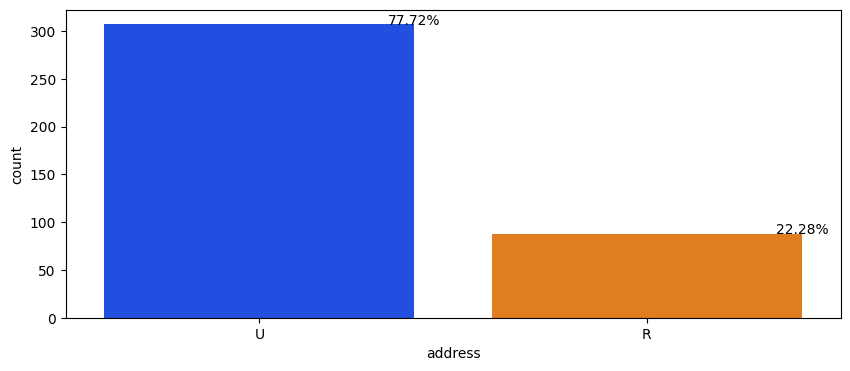

In [18]:
plt.figure(figsize= (10,4))
graph = sns.countplot(x = 'address', data = df, palette= 'bright')
total = float(len(df))
for p in graph.patches:
    pct = f"{(100 * p.get_height()/total):.2f}%"
    x = p.get_x() + p.get_width()
    y = p.get_height()
    graph.annotate(pct, (x, y),ha='center')
plt.show()

### Train Test Split

In [122]:
X=df.drop('G3',axis=1)
y=df['G3']

In [340]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=111)

In [465]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [466]:
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)

In [467]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


### Column Transform

In [341]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer

In [342]:
trans=ColumnTransformer(transformers=[
    ('fnf1',OneHotEncoder(sparse=False,drop='first'),['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic'])
],remainder='passthrough')

In [343]:
X_train=trans.fit_transform(X_train)
X_test=trans.fit_transform(X_test)

### Feature Scaling

In [344]:
from sklearn.preprocessing import StandardScaler  ## helps to get standardized distrubution
ss=StandardScaler()
ss.fit(X_train)
X_train=ss.transform(X_train)
X_test=ss.transform(X_test)

# Linear Regression Model

In [345]:
from sklearn.linear_model import LinearRegression   ## Linear Regression
lr=LinearRegression()

In [346]:
lr.fit(X_train,y_train)

LinearRegression()

Y = mx + c

In [347]:
lr.coef_

array([ 1.89008641e-01,  9.49081494e-02,  4.56400564e-02,  8.99578163e-03,
        1.28816133e-02, -5.98297192e-02,  5.41950418e-02,  2.96827700e-02,
       -2.38522461e-03,  9.74352721e-02, -3.81921851e-02, -1.28169836e-01,
       -3.13406177e-02, -1.06936466e-01,  9.69012391e-02,  1.12632219e-01,
        1.02966429e-01,  2.15231747e-02,  1.42004769e-01,  7.99673844e-02,
        6.03756268e-02, -1.52580967e-01, -1.20795406e-01,  6.51881303e-02,
       -6.70282913e-02, -1.55051547e-01, -2.56795652e-01,  1.06819830e-01,
       -1.38330482e-01,  7.27923655e-02, -1.13509329e-01, -1.55465951e-01,
        3.44320616e-01,  3.22837945e-02,  4.29218693e-03, -2.02832566e-01,
        2.99769503e-01,  1.13536804e-01,  3.88053754e-01,  6.34614100e-01,
        3.56908584e+00])

In [348]:
lr.intercept_    

10.425352112676057

In [349]:
y_predict_linear_reg=lr.predict(X_test)

In [350]:
y_predict_linear_reg=pd.DataFrame(y_predict_linear_reg)

In [351]:
lr.score(X_test,y_test)

0.92671559120036

# Polynomial Regression

Y= C + M1X + M2X^2 + M3X2 + M4X2^2

In [393]:
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=2)
pf.fit(X_train,y_train)
X_train_poly=pf.transform(X_train)
X_test_poly=pf.transform(X_test)

In [394]:
lr.fit(X_train_poly,y_train)

LinearRegression()

In [395]:
lr.score(X_test_poly,y_test,)

0.6164654210513629

In [397]:
poly_reg=lr.predict(X_test_poly)

In [399]:
poly_reg=pd.DataFrame(poly_reg)

# Support Vector Regression

In [355]:
from sklearn.svm import SVR
svr_rbf=SVR(kernel='rbf')

In [356]:
svr_rbf.fit(X_train,y_train)

SVR()

In [357]:
svr_rbf.score(X_test,y_test)

0.642018164027161

In [403]:
svr_predict=svr_rbf.predict(X_test)

In [405]:
svr_predict=pd.DataFrame(svr_predict)

# Decision Tree

In [383]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier(criterion='gini')

In [384]:
dc.fit(X_train,y_train)

DecisionTreeClassifier()

In [385]:
dc.score(X_test,y_test)

0.55

In [406]:
dt_predict=dc.predict(X_test)

In [408]:
dt_predict=pd.DataFrame(dt_predict)